In [1]:
import matplotlib
#matplotlib.use('GTK3Cairo')
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import subprocess
import seaborn as sns

In [2]:
def read_pot(path):
    #datos = [(tiempo,dif)]
    #iteracion
    iteraciones = []
    with open (path, 'r') as f:
        iteracion = f.readline()
        while (iteracion) != "":
            iteracion = int(iteracion)
            datos = []
            for i in range (0,iteracion):
                line = f.readline()
                datos.append( (float(line.split(',')[0]) , float(line.split(',')[1]) ) )
            iteraciones.append((iteracion, datos))
            iteracion = f.readline()
    return iteraciones


In [2]:
def read_vocab(path):
    frecuencias = []
    frec = []
    with open (path, 'r') as f:
        frec = f.readlines()
        for line in frec[1:]:
            frecuencias.append(float(line.split(',')[-2]))
    return frecuencias

In [26]:
def read_medidas(path):
    with open(path, 'r') as f:
        lineas = f.readlines()
    tiempo = float(lineas[1])
    acc = float(lineas[3])
    prec = float(lineas[5])
    recall = float(lineas[7])
    return (tiempo, acc, prec, recall)

In [3]:
vocab_path = "../datos/vocab.csv"

In [4]:
frecuencias = read_vocab(vocab_path)

In [18]:
frec = []
with open (vocab_path, 'r') as f:
    frec = f.readlines()

In [6]:
less_than_zero = list(filter(lambda x: x > 0.005 and x < 0.1, frecuencias))
len(less_than_zero)

2853

In [ ]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(range(1,51), num_iteraciones, marker='o', linestyle = ':', label = "Número de iteraciones para cada autovalor")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("alpha")
plt.ylabel("cantida de iteraciones")
plt.title("Número de iteraciones necesarias hasta converger cada alpha")
plt.legend(loc=2)
#plt.savefig("iteraciones_x_alpha"+".png")
plt.show()

In [ ]:
sns.distplot(less_than_zero, hist = True, kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [49]:
np.mean(frecuencias)

0.0008313836115452495

In [50]:
np.median(frecuencias)

2e-05

In [9]:
np.std(frecuencias)

0.01282299665287

In [21]:
ejecutable = './tp2'
k = 20
norma2 = 1
train_path = 'exp/exp_2/train/train.50000.25000.csv'
test_path = 'exp/exp_2/test/test.50000.25000.csv'
out_path = 'exp/exp_2/test/res.50000.25000.csv'
medidas_path = 'exp/exp_2/medidas/res.50000.25000.csv'


#./tp2 -m [Modo de uso] -i [archivo de entrada train] -q [archivo de entrada test] -o [archivo de salida]  -k (k de kNN) -a (alpha de PCA, depende de modo) -r(archivo de salida de mediciones) -e (experimentación) -t (iteraciones) -l (cota inferior de corte del vocabullario) -u (cota superior de corte del vocabulario) -n (norma)

In [16]:
ul = [0.1,0.3,0.5,0.7,0.9]
ll = [0.005,0.01,0.03,0.04,0.05]

In [105]:

#comand = [ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(i), '-u', str(0.1),  '-n',str(1)]
#" ".join(comand)

'./tp2 -m 0 -i exp/exp_3/train/train.50000.25000.csv -q exp/exp_3/test/test.50000.25000.csv -o exp/exp_3/test/res.50000.25000.0.05 -k 20 -r exp/exp_3/medidas/res.50000.25000.0.05 -l 0.05 -u 0.1 -n 1'

In [109]:

for i in ul:
    #comando = [ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(0.01), '-u', str(i),  '-n',str(1)]
    #comand = " ".join(comando)
    #os.system(comand)
    #subprocess.run([ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(0.01), '-u', str(i),  '-n',str(1)])
    subprocess.Popen([ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(0.01), '-u', str(i),  '-n',str(1)], stdout=subprocess.PIPE)  
    [output, error] = proceso.communicate()
for i in ll:
    #comando = [ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(i), '-u', str(0.1),  '-n',str(1)]
    #comand = " ".join(comando)
    #os.system(comand)
    #subprocess.run([ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(i), '-u', str(0.1),  '-n',str(1)])
    subprocess.Popen([ejecutable, '-m', str(0), '-i',train_path, '-q', test_path, '-o', out_path+str(i), '-k', str(20),'-r', medidas_path+str(i), '-l', str(i), '-u', str(0.1),  '-n',str(1)], stdout=subprocess.PIPE)
    [output, error] = proceso.communicate()    

ValueError: read of closed file

In [93]:
tiempos_u= []
acc_u = []
prec_u = []
recall_u = []
tiempos_l= []
acc_l = []
prec_l= []
recall_l = []
#medidas_u = []
#medidas_l = []
for u in ul:
    #medidas_u.append(list(read_medidas(medidas_path+'.'+str(u))))
    med = read_medidas(medidas_path+'.'+str(u))
    tiempos_u.append(med[0])
    acc_u.append(med[1])
    prec_u.append(med[2])
    recall_u.append(med[3])
for l in ll:
    #medidas_l.append(list(read_medidas(medidas_path+'.'+str(l))))
    med = read_medidas(medidas_path+'.'+str(l))
    tiempos_l.append(med[0])
    acc_l.append(med[1])
    prec_l.append(med[2])
    recall_l.append(med[3])


In [87]:
tiempos_u

[3350.0, 3684.0, 3818.0, 3937.0, 1222.0]

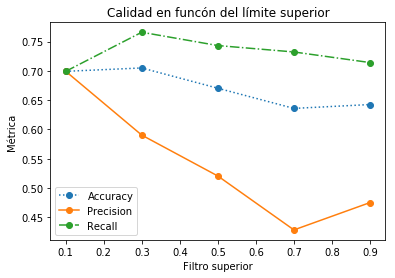

In [97]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ul, acc_u, marker='o', linestyle = ':', label = "Accuracy")
plt.plot(ul, prec_u, marker='o', linestyle = '-', label = "Precision")
plt.plot(ul, recall_u, marker='o', linestyle = '-.', label = "Recall")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("Filtro superior")
plt.ylabel("Métrica")
plt.title("Calidad en funcón del límite superior")
plt.legend(loc=3)
plt.savefig("ul_calidad"+".png")
plt.show()

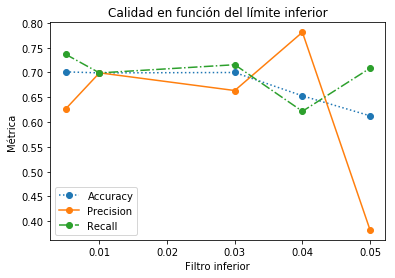

In [98]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ll, acc_l, marker='o', linestyle = ':', label = "Accuracy")
plt.plot(ll, prec_l, marker='o', linestyle = '-', label = "Precision")
plt.plot(ll, recall_l, marker='o', linestyle = '-.', label = "Recall")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("Filtro inferior")
plt.ylabel("Métrica")
plt.title("Calidad en función del límite inferior")
plt.legend(loc=3)
plt.savefig("ll_calidad"+".png")
plt.show()

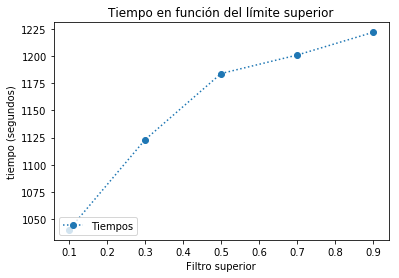

In [99]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ul, tiempos_u, marker='o', linestyle = ':', label = "Tiempos")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("Filtro superior")
plt.ylabel("tiempo (segundos)")
plt.title("Tiempo en función del límite superior")
plt.legend(loc=3)
plt.savefig("ul_tiempo"+".png")
plt.show()

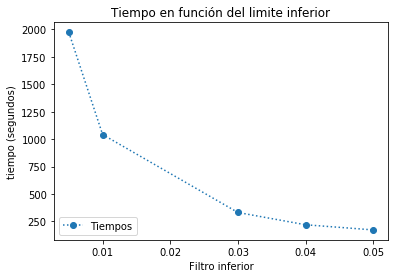

In [100]:
#x = [start+distancia*x for x in range(0,5)]
plt.plot(ll, tiempos_l, marker='o', linestyle = ':', label = "Tiempos")
#plt.plot([z/110-10 for z in range(500,5000)], label = "x³/178")
plt.xlabel("Filtro inferior")
plt.ylabel("tiempo (segundos)")
plt.title("Tiempo en función del limite inferior")
plt.legend(loc=3)
plt.savefig("ll_tiempo"+".png")
plt.show()